In [67]:
import warnings


import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.pipeline import Pipeline, make_pipeline
from plotly.subplots import make_subplots

warnings.simplefilter(action="ignore", category=FutureWarning)

In [68]:
#Load csv data file
df = pd.read_csv("/Users/steve/Documents/Publications/Data_Files/Data_table_CSV.csv")

In [69]:
#Set YEAR as index
df.set_index("YEAR", inplace=True)
df.head(14)

,GHG,FTP,ETX,BDC,LOADED VKM,TOTAL VKM,CUT
YEAR,,,,,,,
2008,788360.91,10057485,12.74,517.89,96336,120015,80.27
2009,768623.78,8926412,12.00,483.81,87104,108703,80.13
2010,763427.52,9181431,11.83,551.97,91150,112518,81.01
2011,756253.87,9209546,11.67,415.66,90530,112011,80.82
2012,729440.79,8603201,11.22,300.99,87631,108386,80.85
2013,726240.72,8532044,11.22,197.49,90170,110753,81.42
2014,734598.26,8775820,10.71,358.69,90947,111738,81.39
2015,748827.44,8896229,10.27,416.45,93690,115011,81.46
2016,764927.12,9106920,10.28,326.28,97920,119668,81.83


In [70]:
#Drop unwanted columns
df.drop(columns=["LOADED VKM", "TOTAL VKM", "GHG"], inplace=True)
df.head()

,FTP,ETX,BDC,CUT
YEAR,,,,
2008,10057485,12.74,517.89,80.27
2009,8926412,12.00,483.81,80.13
2010,9181431,11.83,551.97,81.01
2011,9209546,11.67,415.66,80.82
2012,8603201,11.22,300.99,80.85


In [71]:
#Use the describe method to print the summary statistics of the data
df[["FTP", "ETX", "BDC", "CUT"]].describe()

,FTP,ETX,BDC,CUT
count,1.400000e+01,14.000000,14.000000,14.000000
mean,9.360598e+06,11.160714,423.080714,81.330000
std,6.057976e+05,0.696170,97.200528,0.624007
min,8.532044e+06,10.270000,197.490000,80.130000
25%,8.903775e+06,10.735000,372.932500,80.890000
50%,9.195488e+06,11.030000,448.000000,81.440000
75%,9.864759e+06,11.557500,487.380000,81.825000
max,1.039004e+07,12.740000,551.970000,82.030000


In [72]:
#Augumented Dickey Fuller Stationarity Test
import statsmodels.tsa.stattools as smt

# Run the ADF test on the data
result = smt.adfuller(df['FTP'])

# Extract the test statistic and critical values
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print the results of the ADF test
print("Test Statistic: ", test_statistic)
print("p-value: ", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(key, value)

# Check if the test statistic is below the critical values to determine if the series is stationary
if test_statistic < critical_values['5%']:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

Test Statistic:  -5.847067846483731
p-value:  3.6624392579991184e-07
Critical Values:
1% -4.473135048010974
5% -3.28988060356653
10% -2.7723823456790124
The series is stationary.


In [73]:
result = smt.adfuller(df['ETX'])

# Extract the test statistic and critical values
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print the results of the ADF test
print("Test Statistic: ", test_statistic)
print("p-value: ", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(key, value)

# Check if the test statistic is below the critical values to determine if the series is stationary
if test_statistic < critical_values['5%']:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

Test Statistic:  -1.7731237517908778
p-value:  0.3938842558927925
Critical Values:
1% -4.6651863281249994
5% -3.3671868750000002
10% -2.802960625
The series is non-stationary.


In [74]:
result = smt.adfuller(df['BDC'])

# Extract the test statistic and critical values
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print the results of the ADF test
print("Test Statistic: ", test_statistic)
print("p-value: ", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(key, value)

# Check if the test statistic is below the critical values to determine if the series is stationary
if test_statistic < critical_values['5%']:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

Test Statistic:  -1.668348455501345
p-value:  0.44748962528789704
Critical Values:
1% -4.6651863281249994
5% -3.3671868750000002
10% -2.802960625
The series is non-stationary.


In [75]:
result = smt.adfuller(df['CUT'])

# Extract the test statistic and critical values
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Print the results of the ADF test
print("Test Statistic: ", test_statistic)
print("p-value: ", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(key, value)

# Check if the test statistic is below the critical values to determine if the series is stationary
if test_statistic < critical_values['5%']:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

Test Statistic:  -1.3878807470246608
p-value:  0.5880722527496524
Critical Values:
1% -4.473135048010974
5% -3.28988060356653
10% -2.7723823456790124
The series is non-stationary.


In [76]:
import statsmodels.tsa.vector_ar.vecm as smt

# Run the Johansen  Cointegration test on the data
result = smt.coint_johansen(df, det_order=0, k_ar_diff=1)

# Extract the test statistics and critical values
eigenvalues = result.eig
critical_values = result.cvt[:,2]

# Print the results of the Johansen test
print("Eigenvalues: ", eigenvalues)
print("Critical Values:", critical_values)

# Check if the eigenvalues are greater than the critical values to determine if the series are cointegrated
number_of_cointegrated_series = 0
for i in range(len(eigenvalues)):
    if eigenvalues[i] > critical_values[i]:
        number_of_cointegrated_series = number_of_cointegrated_series + 1

if number_of_cointegrated_series > 0:
    print("The series are cointegrated.")
else:
    print("The series are not cointegrated.")

Eigenvalues:  [1.         0.98102844 0.45262994 0.32922835]
Critical Values: [54.6815 35.4628 19.9349  6.6349]
The series are not cointegrated.


/Users/steve/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/vector_ar/vecm.py:726: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
/Users/steve/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/vector_ar/vecm.py:728: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


In [78]:
# Create series for dependent variable
y = df['FTP']
y_rescaled = y * 0.0001

# Create dataframe for independent variables
X = df[['ETX', 'BDC', 'CUT']]
X_rescaled = X * 0.0001

In [79]:
import arch

# Specify GARCH(1,1) model with ARMA(1,1) errors
model = arch.arch_model(y_rescaled, x=X_rescaled, mean='ARX', vol='GARCH', p=1, q=1, o=1)

In [80]:
# Estimate model parameters
results = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 66.43219322716651
Iteration:      2,   Func. Count:     19,   Neg. LLF: 67.16654556504987
Iteration:      3,   Func. Count:     29,   Neg. LLF: 66.37249910189222
Iteration:      4,   Func. Count:     38,   Neg. LLF: 66.36128478762299
Iteration:      5,   Func. Count:     47,   Neg. LLF: 66.3440117041656
Iteration:      6,   Func. Count:     56,   Neg. LLF: 66.31642850363839
Iteration:      7,   Func. Count:     65,   Neg. LLF: 66.29704602988095
Iteration:      8,   Func. Count:     74,   Neg. LLF: 66.29246885776706
Iteration:      9,   Func. Count:     83,   Neg. LLF: 66.29227664604772
Iteration:     10,   Func. Count:     92,   Neg. LLF: 66.29225210585942
Iteration:     11,   Func. Count:    101,   Neg. LLF: 66.29223139422291
Iteration:     12,   Func. Count:    110,   Neg. LLF: 66.29214325474697
Iteration:     13,   Func. Count:    119,   Neg. LLF: 66.29194616315625
Iteration:     14,   Func. Count:    128,   Neg. LLF: 66.29139833

In [81]:
# Print estimation results
print(results.summary())

                        AR-X - GJR-GARCH Model Results                        
Dep. Variable:                    FTP   R-squared:                       0.720
Mean Model:                      AR-X   Adj. R-squared:                  0.636
Vol Model:                  GJR-GARCH   Log-Likelihood:               -65.0793
Distribution:                  Normal   AIC:                           146.159
Method:            Maximum Likelihood   BIC:                           151.271
                                        No. Observations:                   14
Date:                Fri, Apr 21 2023   Df Residuals:                       10
Time:                        09:57:12   Df Model:                            4
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const      -7606.7313   1371.566     -5.546  2.922e-

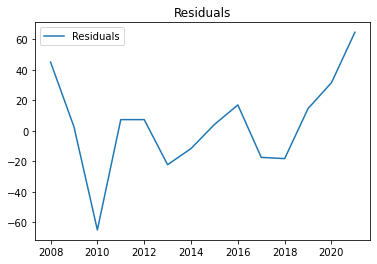

In [92]:
# Check the residuals
residuals = results.resid
plt.plot(residuals)
plt.title("Residuals")
plt.legend(['Residuals'])
plt.show()

In [96]:
# Perform Durbin-Watson Autocorrelation test

from statsmodels.stats.stattools import durbin_watson


# calculate Durbin-Watson statistic
dw_statistic = durbin_watson(residuals)

# print the DW statistic
print("Durbin-Watson statistic:", dw_statistic)

# interpret the DW statistic
if dw_statistic < 1.5:
    print("Positive autocorrelation detected.")
elif dw_statistic > 2.5:
    print("Negative autocorrelation detected.")
else:
    print("No significant autocorrelation detected.")


Durbin-Watson statistic: 1.2492219290972995
Positive autocorrelation detected.


In [58]:
#Heteroscedasticity Test
from statsmodels.stats.diagnostic import het_arch

# assuming 'residuals' is a NumPy array or Pandas Series containing the residuals of your ARCH model
lm, lmpvalue, fval, fpvalue = het_arch(residuals)

# print the test statistic and p-value
print("Lagrange Multiplier test statistic:", lm)
print("P-value for LM test:", lmpvalue)
print("F-test statistic for ARCH:", fval)
print("P-value for F-test:", fpvalue)

# interpret the results
alpha = 0.05
if lmpvalue < alpha or fpvalue < alpha:
    print("The residuals exhibit heteroscedasticity.")
else:
    print("The residuals do not exhibit heteroscedasticity.")

Lagrange Multiplier test statistic: 0.2204507093186292
P-value for LM test: 0.8956322776458014
F-test statistic for ARCH: 0.08421614167518389
P-value for F-test: 0.9199483076777146
The residuals do not exhibit heteroscedasticity.


In [59]:
#Normality Test
from scipy.stats import normaltest

# assuming 'residuals' is a NumPy array or Pandas Series containing the residuals of your ARCH model
statistic, p_value = normaltest(residuals)

# print the test statistic and p-value
print("Normality Test Statistic:", statistic)
print("P-value:", p_value)

# interpret the results
alpha = 0.05
if p_value < alpha:
    print("The residuals are not normally distributed.")
else:
    print("The residuals are normally distributed.")

Normality Test Statistic: 1.2233657798618036
P-value: 0.5424372383535839
The residuals are normally distributed.


/Users/steve/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
